<h1 style="text-align: center; vertical-align: middle;">Numerical Methods of Accelerator Physics</h1>
<h2 style="text-align: center; vertical-align: middle;">Lecture by Dr. Adrian Oeftiger</h2>

<img src="./img/etit.png" style="width: 20%; margin: auto;" />

<h3 style="text-align: center; vertical-align: middle;">Part 4: 18.11.2022</h3>

<h2>Run this notebook online!</h2>

Interact and run this jupyter notebook online:

<div class="alert alert-block alert-info" style="text-align:center;">
1. via the public mybinder.org service: <br />

<p style="text-align: center; margin-left, margin-right: auto; width: 100%;">
<a href="https://mybinder.org/v2/gh/aoeftiger/TUDa-NMAP-04/v1.0"><img src="./img/binder_logo.svg" /></a>
</p>
</div>

<div class="alert alert-block alert-success" style="text-align:center;">
2. on the <a href="https://tu-jupyter-i.ca.hrz.tu-darmstadt.de/">local TU Darmstadt jupyterhub $\nearrow$</a> (using your TU ID)

$\implies$ make sure you installed all the required python packages (see the [README](./README.md))!
</div>

Finally, also find this lecture rendered [as HTML slides on github $\nearrow$](https://aoeftiger.github.io/TUDa-NMAP-04/) along with the [source repository $\nearrow$](https://github.com/aoeftiger/TUDa-NMAP-04).

<h2 style="color: #b51f2a">Refresher!</h2>

- <b>sources for non-linearities</b> in accelerators
- <b>deterministic chaos</b>: (bounded) deterministic dynamics with a positive Lyapunov exponent
    - <b>sensitivity</b> to initial conditions
    - cannot reliably compute <b>prediction for long-term time scales</b>
- early indicators of chaotic motion:
    - (maximum) <b>Lyapunov exponent</b>
    - frequency diffusion via <b>Frequency Map Analysis (FMA)</b>, employing the NAFF algorithm
- numerical artefacts: <b>rounding</b> and <b>truncation</b>, <b>machine precision</b>

<h2 style="color: #b51f2a">Today!</h2>

1. Acceleration with RF Cavities
2. Longitudinal Beam Dynamics (Tracking Equations)

<h2>A Relativistic Particle</h2>

Relativistic particle of rest mass $m_0$ at velocity $\mathbf{v}$ features <b>momentum</b> 

$$p=|\mathbf{p}|=|\gamma m_0 \mathbf{v}| = \gamma m_0 \beta c$$

where

$$\begin{align}
c&\text{: speed of light in vacuum,}\qquad &c&\doteq 2.998\times 10^8 \text{m/s} \\
\beta&\text{: particle speed in units of }c,\qquad&\beta&\doteq |\mathbf{v}/c| < 1 \\
\gamma&\text{: relativistic Lorentz factor,}\qquad &\gamma&\doteq\cfrac{1}{\sqrt{1 - \beta^2}} > 1
\end{align}$$

<b>Total energy</b> defined by

$$E_\text{tot}=\gamma m_0 c^2$$

and related to momentum $p$ by the relativistic equation

$$E_\text{tot}^2=\bigl(m_0c^2\bigr)^2 + (pc)^2$$

<h2>Lorentz Force</h2>

Utilise electromagnetic fields $(\mathbf{E},\mathbf{B})$ to exert <b>Lorentz force</b> $\mathbf{F}_L$ on particle of charge $q$:
    
$$\frac{d\mathbf{p}}{dt} = \mathbf{F} = q\,(\mathbf{E}+\mathbf{v}\times\mathbf{B})$$

Deriving relativistic equation by time $t$ and using definition of $E_\text{tot}$:

$$\implies E_\text{tot} \frac{dE_\text{tot}}{dt} = c^2\cdot\mathbf{p}\cdot \frac{d\mathbf{p}}{dt} = c^2\cdot \mathbf{p}\cdot\mathbf{F}_L$$

$$\stackrel{/E_\text{tot}}{\implies} \frac{dE_\text{tot}}{dt} = \mathbf{v}\cdot\mathbf{F}_L = q\cdot \mathbf{v}\cdot(\mathbf{E}+\underbrace{\mathbf{v}\times \mathbf{B}}\limits_\text{cancels}) = q\cdot \mathbf{v}\cdot\mathbf{E}$$

i.e. the total energy can only be increased by electric field components!

<h2>How to Accelerate?</h2>

<img src="./img/frenet-serret.png" alt="Frenet Serret coordinate system" style="width:30%; float:right; margin-left:1em;" />

Particle moves along path length $s$ with velocity

$$\mathbf{v}_s = \frac{d\mathbf{s}}{dt}$$

Variation of particle energy along $s$ ("$\approx$"$\rightarrow$ paraxial approximation):

$$\implies \frac{dE_\mathrm{tot}}{ds} = \frac{1}{v_s} \frac{dE_\mathrm{tot}}{dt} = q \cdot \frac{\mathbf{v}}{v_s}\cdot \mathbf{E} = q \cdot \Bigl(\underbrace{\frac{v_z}{v_s}}\limits_{\mathop{\approx}1}E_z + \underbrace{\frac{v_x}{v_s}}\limits_{\mathop{\approx}\frac{dx}{ds}\mathop{\equiv}x'}\cdot E_x + \underbrace{\frac{v_y}{v_s}}\limits_{\mathop{\approx}\frac{dy}{ds}\mathop{\equiv}y'}\cdot E_y \Bigr)$$

$$\implies\left\{\begin{array}\,
    x',~y'&\text{: transverse momenta or slopes, small }\leftrightarrow\text{transverse electric fields have weak impact} \\
    E_z&\text{ : longitudinal electric field most efficient to provide }\cfrac{dE_\mathrm{tot}}{ds}
\end{array}\right.$$

<h2>Accelerate!</h2>

3 typical ways to supply $E_z$:
    
1. <b>DC field</b> (single passage!)

    - electrostatic accelerators: few MV/m before breakdown
    - plasma accelerators: more than 100 GV/m
    
2. AC field: <b>travelling wave rf cavities</b> <br />$\rightarrow$ ultra-relativistic particles (typically electrons)

3. <span style="color:red;">AC field: <b>resonator / standing wave rf cavities</b></span>: <br /> $\rightarrow$ most versatile standard (International Linear Collider project: 35 MV/m)

<div style="text-align: center; width:100%;">
    <h2 style="margin-bottom: 1em;">Part I: Momentum / Energy Gain</h2>
Longitudinal phase space: $(z, {\color{red}{\delta}})$
</div>

<h2>RF Resonator: Modes</h2>

<img src="./img/cavity-map.png" alt="Field amplitude map in rf cavity" style="width:20%; float: right; margin-left:1em;" />

Particles travel through rf cavity in vacuum: piece of metal enclosing an empty volume!

$\implies$ boundary conditions $\leftrightarrow$ electromagnetic discrete solutions $\mathbf{E}_n(\mathbf{r})$ to Maxwell equations, <b>resonating modes</b>!

Each resonating mode identified by index $n$, characterised by field amplitude maps $\mathbf{E}_n(\mathbf{r}),\mathbf{B}_n(\mathbf{r})$ and <b>oscillating at RF frequency</b> $f_n=\omega_n/2\pi$! 

<!--Wave equation inside cavity:

$$\nabla^2 \mathbf{E}_n + \frac{\omega_n{}^2}{c} \mathbf{E}_n = \mathbf{0}$$ -->

$\mathbf{E}_n$ satisfies the boundary conditions! At given time $t$, total electric field in cavity given by:

$$\mathbf{E}(\mathbf{r}, t) = \sum\limits_{n} e_n(t) \cdot \mathbf{E}_n(\mathbf{r})$$

where $e_n(t)$ is the field time variation (can be modelled by RLC circuit i.e. damped harmonic oscillator equation).

<p style="clear: both; font-size: 10pt; text-align: right; float: right;">
image from <a href="https://arxiv.org/pdf/1404.0927.pdf">B. Holzer</a></p>

<h2>RF Resonator: Maxwell Equations</h2>

<img src="./img/cavity.png" alt="Geometry of rf cavity" style="clear: both; width:20%; float: right; margin-left:1em;" />

Often use <b>F</b>inite <b>I</b>ntegration <b>T</b>echnique (cf. other lectures) to compute $\mathbf{E}_n(\mathbf{r}),\mathbf{B}_n(\mathbf{r})$ for given rf cavity geometry based on Maxwell equations:

$$\left\{\begin{array}\,
    \nabla \cdot \mathbf{E} &= \frac{\rho}{\epsilon_0} \\
    \nabla \times \mathbf{E} + \frac{\partial\mathbf{B}}{\partial t} &= \mathbf{0} \\
    \nabla \cdot \mathbf{B} &= 0 \\
    \nabla \times \mathbf{B} - \frac{1}{c^2} \frac{\partial\mathbf{E}}{\partial t} &=  \mu_0 \mathbf{j}
\end{array}\right\}
    \quad\text{with bound. cond.}\quad
\left\{\begin{array}\,
    \mathbf{n}\cdot \mathbf{E}_n &= \frac{\sigma}{\epsilon_0} \\
    \mathbf{n}\times \mathbf{E}_n &= \mathbf{0} \\
    \mathbf{n}\cdot \mathbf{B} &= 0 \\
    \mathbf{n}\times (\mu\cdot\mathbf{B}_n) &= \mathbf{K}
\end{array}\right\}$$

where $\mathbf{n}$ is normal to the conductor surface, $\sigma$ the charge surface density and $\mathbf{K}$ the current surface density.

$\implies$ choose one $\mathbf{E}_n$ as accelerating mode with optimal $E_z$ component along cavity axis (often TM${}_{010}$), optimise cavity geometry, mode is excited by injecting rf power via coupler!

<p style="clear: both; font-size: 10pt; text-align: right; float: right;">
image from <a href="https://cas.web.cern.ch/sites/default/files/lectures/baden-2004/joel.pdf">J. Le Duff</a></p>

<h2>Transit-time Factor</h2>

Consider only accelerating mode excited in cavity. Particle travelling along cavity axis $s$ while time $t$ passes:

$$E_z(s, t) = E_{z,0}(s) \cdot \sin\bigl(\omega_\text{rf}\, t + \varphi_s\bigr)$$

Here, $\varphi_s$ refers to <b>synchronous phase</b> at arrival of "synchronous" reference particle. <b>Total cavity voltage</b> is given by:

$$V_0 = \int\limits_{-\infty}^{+\infty} ds\cdot|E_{z,0}(s)|$$

Hypothetical maximum energy gain is $\Delta W = |q|\cdot V_0$ for particle of charge $q$.

$\implies$ Real $\Delta W$ reduces due to inevitable field variation during gap transit. <b>Transit-time factor</b>:

$$ T = \frac{\text{energy gain of particle with }v=\beta c}{\text{maximum energy gain (particle with }v\rightarrow\infty\text{)}} \leq 1 $$

<h2>Approximation #1: Velocity Change</h2>

<i>A priori</i>, energy gain is associated with particle velocity change, i.e. exact $T$ depends on $d\beta$ during passage through rf cavity.

For synchrotrons, effect of velocity change is typically negligible to determine energy gain ($\Delta W\propto\Delta\gamma$):

$$\frac{d\beta}{\beta} = \frac{1}{\beta^2\gamma^2} \cdot \frac{d\gamma}{\gamma}$$

$\implies$ two scenarios where approximation of $T$ independence of $\Delta\beta$ applies:

$$\left\{\begin{array}\,
    \gamma \gg 1 &\text{: particle is already ultra-relativistic} \\
    \Delta\gamma \ll \beta\gamma &\text{: energy gain in cavity is much smaller than particle momentum}
\end{array}\right.$$

<h2><u>Simple</u> Example for $T$</h2>

Consider <i>uniform</i> standing wave with $E_{z,0}(s)=V_0/g=\mathrm{const}$ across gap width $g$ (zero field outside), at crest of rf wave, i.e. $\varphi_s=\pi/2$:

$$E_z(s, t) = \frac{V_0}{g} \,\cos(\omega_\text{rf}\,t)$$

The synchronous particle travels along $s=\beta c t$ (assuming constant $v=\beta c$) and picks up an actual maximum energy gain

$$\implies \Delta W = \cfrac{q V_0}{g}\int\limits_{-g/2}^{+g/2} ds\cdot \cos\left(\cfrac{\omega_\text{rf}\,s}{\beta c}\right)$$

and the transit-time factor becomes:

$$T = 
\left| \cfrac{\sin\left(\cfrac{\omega_\text{rf} g}{2\beta c}\right)}{\cfrac{\omega_\text{rf} g}{2\beta c}} \right| \quad \implies\quad T\rightarrow 1 \Leftrightarrow \left\{\begin{array}\,
    g \rightarrow 0 \\
    \omega_\text{rf} \rightarrow 0 \\
    \beta c \rightarrow \infty
\end{array}\right.$$

$\implies$ reduction in effective energy gain ($T<1$) is mostly relevant for low-energy protons and ions!

<h2>Energy Gain by RF Cavity</h2>

Design / reference energy increases as determined by synchronous phase $\varphi_s$,

$$\Delta W_0 = q V\cdot\sin(\varphi_s)$$

with the effective rf voltage $V = V_0 T$.

Real particles travel at a longitudinal distance $z = s - \beta c t$ to synchronous particle. They experience the rf kick at phase $\varphi = \omega_\text{rf}\,t = \varphi_s - \cfrac{\omega_\text{rf} z}{\beta c}$. Corresponding energy gain is $\Delta W = q V\cdot \sin(\varphi)$.

Expressed as an energy distance $\Delta E$ to the synchronous particle, $\Delta E=E_\text{tot} - E_{\text{tot},0}$, the discrete energy update of an arbitrary particle passing through an rf cavity becomes

$$\begin{align}
\Delta E|_\text{after} &= \Delta E|_\text{before} + \Delta W - \Delta W_0 \\
&= \Delta E|_\text{before} + q V\cdot \bigl(\sin(\varphi) - \sin(\varphi_s)\bigr)
\end{align}$$

In [1]:
from config import (np, plt, plot_rfwave, #RFBucket, 
                    plot_hamiltonian, plot_force, plot_potential)
from scipy.constants import m_p, e, c
%matplotlib inline

<h2>Phase Focusing Effect</h2>

<div class="alert alert-block alert-success" style="text-align:center;">
$$\Delta E|_\text{after} = \Delta E|_\text{before} + q V\cdot \left(\sin\left(\varphi_s - \frac{\omega_\text{rf}z}{\beta c}\right) - \sin(\varphi_s)\right)$$
</div>

Phase focusing principle (classical regime):
- particle with $\varphi>\varphi_s$ arrives later and has $\color{blue}{\delta < 0}$: <b>ac</b>celerated towards <span style="color: gray;">synchronous particle</span>!
- particle with $\varphi<\varphi_s$ arrives early and has $\color{orange}{\delta > 0}$: <b>de</b>celerated towards <span style="color: gray;">synchronous particle</span>!

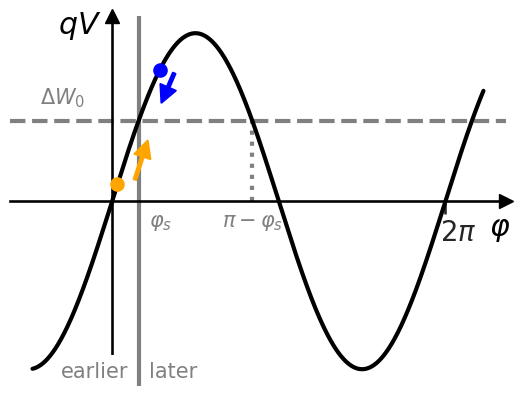

In [2]:
plot_rfwave();

<h2>Earnshaw's Theorem</h2>

<div class="alert alert-block alert-success" style="text-align:center;">"A charged body cannot be held in stable equilibrium by electrostatic forces from other charged bodies."</div>

<p style="text-align: right;"><a href="./EarnshawPaper.pdf">S. Earnshaw (1839), Trans. Camb. Phil. Soc. <b>7</b> 97<!--<br />"On the Nature of the Molecular Forces which Regulate the Constitution of the Luminiferous Ether"--></a></p>

$\implies$ application to rf accelerators: always one direction in 3D which is defocused!

<h2>Approximation #2: Transverse Defocusing</h2>

<img src="./img/cavity-fields.png" alt="Electric field lines in rf cavity" style="width: 20%; float:right; margin-left: 1em;" />

Real $\mathbf{E}$ field across gap in rf cavities has transverse component when off axis, classical regime:
- focusing at entry
- defocusing at exit

$\implies$ DC field leads to net focusing effect (due to gain in longitudinal momentum), but AC field in case of stable longitudinal motion: net defocusing effect (rise in voltage during passage)

$\implies$ typically very weak vs. quadrupole fields and hence often neglected for synchrotrons

<h2>Beam rigidity</h2>

Constant dipole field $B$ to steer reference particle around corner at bending radius $\rho$:

$$\begin{align}
F_\text{centrip} &= F_\text{L} \\
\frac{\gamma m_0 v^2}{\rho} &= |q| v B
\end{align}$$

<div class="alert alert-block alert-success" style="text-align:center;">
$$\implies B\rho = \cfrac{p}{|q|}$$
    <p style="margin-top: 1em; text-align: center;">"<b>Beam rigidity</b>"</p>
</div>




<h2>Synchrotron</h2>

<img src="./img/synchrotron.png" alt="Sketch of a synchrotron" style="float:right; width:20%; margin-left:1em;" />

A synchrotron:
- is a ring with a constant reference orbit of circumference $C$, <br />determined by the dipole magnets (defining the beam rigidity)
- has rf systems powered at revolution frequency $f_\text{rev}$ <br />or integer multiple of it ("harmonic" $h$): <b>synchronisation</b>!

$$\begin{align}
f_\text{rev} &= \frac{\beta c}{C} \\
f_\text{rf} &= h\,f_\text{rev}
\end{align}$$

$\implies$ $h$ synchronous particles moving on reference orbit! To accelerate them and for longitudinal phase focusing around them, apply $E_z$ in rf cavity!

<span style="color: #e6541a;">$\implies$ only works with AC field! Why not DC field across cavity gap?</span>

<p style="clear: both; font-size: 10pt; text-align: right; float: right;">
image from <a href="https://npac.ijclab.in2p3.fr/wp-content/uploads/2020/Cours/Accelerators/Longitudinal_dynamics_doc.pdf">A. Chance and N. Pichoff</a></p>

<h2>Acceleration in Synchrotron</h2>

<img src="./img/sps-cycle.png" alt="CERN SPS super-cycle showing magnetic ramps" style="width:30%; float:right; margin-left: 1em;" />

Require dipole fields to align with increasing momentum to maintain <b>synchronicity</b>!

$$\dot{B}=\frac{\dot{p}}{|q|\rho}$$

$\implies$ "cycle": synchrotrons ramp up magnets for acceleration (and back down to receive next beam for acceleration)

<div style="text-align: center; width:100%;">
    <h2 style="margin-bottom: 1em;">Part II: Longitudinal Drift</h2>
Longitudinal phase space: $({\color{red}{z}}, \delta)$
</div>

<h2>Mechanism behind Synchrotron</h2>

Conceptual "flow chart" of synchrotron operation principle:

1. dipole field $B$ increase
2. thus, bending radius  $\rho$ decrease
3. thus, reference orbit length decrease
4. thus, synchronous phase $\varphi_s$ decrease (earlier arrival of synchronous particle)
5. thus, reference energy/momentum increase (if sufficient rf voltage)
6. thus, back to synchronism (possibly shorter equilibrium reference orbit)

$\implies$ typically magnetic field ramp $\dot{B}$ is slow enough $\implies$ adiabatic acceleration, particles remain focused around synchronous particle

<h2>Off-momentum Trajectory</h2>

<img src="./img/dispersive_orbit_in_dipole.png" alt="Dispersive orbit in dipole magnet" style="float:right; width:20%; margin-left: 1em;"/>

<p style="clear: both; font-size: 10pt; text-align: right; float: right;">
image from <a href="https://people.nscl.msu.edu/~haoy/teaching/fundamental_AP/transverse_dynamics/transverse_dynamics.html">Y. Hao</a></p>

<img src="./img/microtron.svg" alt="Microtron" style="clear: both; float:right; width: 20%; margin-left: 1em; margin-top: 1em;" />

Particles with higher momentum $\delta = \Delta p/p > 0$ than the reference particle are bent less (larger $p$ $\implies$ larger $\rho$)!

$$\implies d\ell = \left(1 + \frac{x}{\rho(s)}\right) ds$$

$\implies$ larger equilibrium orbit around the machine for fixed dipole fields $B$!

Can describe this horizontal offset $x$ due to momentum offset $\delta$ by dispersion function $D_x(s)$ (more details later in transverse dynamics lecture): 

$$x(s) = D_x(s) \delta$$

Integrating around machine to get full orbit length:

$$\ell_\text{tot} = \oint d\ell = \underbrace{\oint ds}\limits_{\mathop{\equiv} C} + \delta \oint ds\,\frac{D_x(s)}{\rho(s)}$$

<p style="clear: both; font-size: 10pt; text-align: right; float: right;">
image by <a href="https://commons.wikimedia.org/wiki/File:ClassicMicrotronSketch.svg">BR84, Wikimedia</a></p>

<h2>Momentum Compaction Factor</h2>

Relative difference in path length $\Delta C/C = (\ell_\text{tot} - C)/C$ around the ring compared to synchronous particle is therefore:
    
$$\frac{\Delta C}{C} = \delta~ \underbrace{\frac{1}{C} \oint ds\,\frac{D_x(s)}{\rho(s)}}\limits_{\mathop{\doteq}\alpha_c} = \alpha_c \frac{\Delta p}{p}$$

The momentum compaction factor expresses "how much longer the path length around the ring becomes for higher momenta"!

<div class="alert alert-block alert-success" style="text-align:center;">
$$\alpha_c = \frac{1}{C} \oint ds\,\frac{D_x(s)}{\rho(s)}$$
    <p style="margin-top: 1em; text-align: center;">"<b>Momentum compaction factor</b>"</p>
</div>

$\implies$ $\rho=\infty$ in straight sections, $\alpha_c=\cfrac{2\pi\langle D_x \rangle_\text{mean}}{C}$ with the mean value referring to dipole $\mathbf{B}$ field areas only!

<b>Note:</b> $\alpha_c$ is an external property given by the magnet configuration.

<h2>Change of Arrival Time</h2>

How does the revolution period (or arrival time of a particle after one turn) $T_\text{rev}$ change with momentum deviation $\delta$?

$$ T_\text{rev} = \frac{1}{f_\text{rev}} = \frac{C}{\beta c} $$

With logarithmic differentiation:

$$\frac{\Delta T_\text{rev}}{T_\text{rev}} = \frac{\Delta C}{C} - \frac{\Delta \beta}{\beta}$$

Can find $\Delta\beta$ relation to momentum deviation via total momentum definition $\bigl($and $\gamma=1/\sqrt{1-\beta^2}\bigr)$:

$$p = \beta\gamma m_0 c \implies \frac{\Delta p}{p} = \frac{\Delta\beta}{\beta} + \frac{\Delta\gamma}{\gamma} = \frac{1}{\gamma^2}\cdot \frac{\Delta\beta}{\beta}$$

<h2>Phase-slip Factor</h2>

Collecting all terms for the arrival time deviation (the longitudinal drift):

$$\begin{align}
    \frac{\Delta T_\text{rev}}{T_\text{rev}} &= \frac{\Delta C}{C} - \frac{\Delta \beta}{\beta} \\
    &= \alpha_c \frac{\Delta p}{p} - \frac{1}{\gamma^2}\cdot \frac{\Delta p}{p} \equiv \eta \delta
\end{align}$$

The phase-slip factor expresses "how much arrival time delay a momentum offset causes"!

<div class="alert alert-block alert-success" style="text-align:center;">
$$\eta = \alpha_c - \frac{1}{\gamma^2}$$
    <p style="margin-top: 1em; text-align: center;">"<b>Phase-slip factor</b>"</p>
</div>

<b>Note:</b> $\eta$ changes with the particle energy via $\gamma$!

<h2>Longitudinal One-turn Map I</h2>

The energy gain in the rf cavity,

$$\Delta E|_\text{after} = \Delta E|_\text{before} + q V\cdot \left(\sin\left(\varphi_s - \frac{\omega_\text{rf}z}{\beta c}\right) - \sin(\varphi_s)\right) \quad ,$$

and the longitudinal drifting (or phase slippage), $\Delta T_\text{rev} = \eta \delta T_\text{rev}$, form the discrete longitudinal one-turn map or tracking equations (in absence of other energy loss terms such as synchrotron radiation).

Express tracking equations in terms of the phase-space coordinates $(z, \delta)$ without acceleration $\Delta E_{\text{tot},0}=0$: after one turn the longitudinal offset $z=s-\beta ct$ amounts to

$$z=C-\beta c (T_{\text{rev},0} + \Delta T_\text{rev}) = -\beta c \Delta T_\text{rev} \implies z_{n+1}=z_n - \eta C \delta $$ 

and with $\delta = \frac{\Delta p}{p_0} = \frac{1}{p_0}\cdot \frac{\Delta E}{\beta c}$, 

$$\delta_{n+1} = \delta_n + \cfrac{q V}{\beta c p_0}\cdot\sin\left(\varphi_s - \cfrac{\omega_\text{rf}z_{n+1}}{\beta c}\right) \quad .$$

<h2>Longitudinal One-turn Map II</h2>

In case of acceleration it is more convenient to use $(z,\Delta p)$, for purely longitudinal simulation models often also $(\varphi,\Delta E_{tot}/\omega_\text{rev})$ for which phase-space area remains invariant even during acceleration.

As long as $\beta c$ changes, the rf frequency needs to be synchronised as 

$$\omega_\text{rf}=h\omega_\text{rev}=2\pi h / T_\text{rev} = 2\pi h \beta c/C \quad .$$

<div class="alert alert-block alert-success" style="text-align:center;">
The <b>longitudinal tracking equations</b> from turn $n$ to $n+1$ in a synchrotron hence read
    
$$\left\{\begin{array}\,
    z_{n+1} &= z_n - \eta C \left(\cfrac{\Delta p}{p_0}\right)_n \\
    (\Delta p)_{n+1} &= (\Delta p)_n + \cfrac{q V}{(\beta c)_n}\cdot\left(\sin\left(\varphi_s - \cfrac{2\pi}{C}\cdot hz_{n+1}\right) - \sin(\varphi_s)\right)
\end{array}\right.$$

<p style="text-align: center; margin-top: 1em;">with the synchronous phase $\varphi_s$ determined by $(\delta p_0)_\text{turn} = \frac{q V}{\beta c}\,sin\bigl(\varphi_s\bigr)$.</p>
</div>

<h2>Transition Energy and Stability</h2>

Defining the <b>transition energy</b>, $$\gamma_\text{t} \doteq \frac{1}{\sqrt{\alpha_c}} \quad ,$$

(i.e. $\eta = 1/\gamma_\text{t}^2 - 1/\gamma^2$) can distinguish two regimes: 

| <b>classical regime</b> | <b>relativistic regime</b> |
| :-: | :-: |
| $\eta < 0$ | $ \eta > 0$ |
| $\gamma < \gamma_\text{t}$ | $\gamma > \gamma_\text{t}$ |
| higher-momentum particles with $\delta>0$ are faster and arrive before synchronous particle | higher-momentum particles with $\delta>0$ have no velocity advantage ($\beta \rightarrow 1$) but longer path to cover and arrive after synchronous particle |
| $\implies$ choose $\varphi_s$ with rising slope of $V(\varphi)$ | $\implies$ choose $\varphi_s$ with falling slope of $V(\varphi)$ (i.e. $\pi-\varphi_s$ compared to below transition) |

<p style="color: #e6541a; margin-top: 4em;">$\implies$ what happens to phase focusing at $\gamma=\gamma_\text{t}$?</p>

|  || $\gamma<\gamma_\text{t}$ || $\gamma>\gamma_\text{t}$ |
| :- || :-: || :-: |
| $\varphi>\varphi_s$ || $\color{blue}{\delta < 0}$ || $\color{orange}{\delta > 0}$ |
| $\varphi<\varphi_s$ || $\color{orange}{\delta > 0}$ || $\color{blue}{\delta < 0}$ |

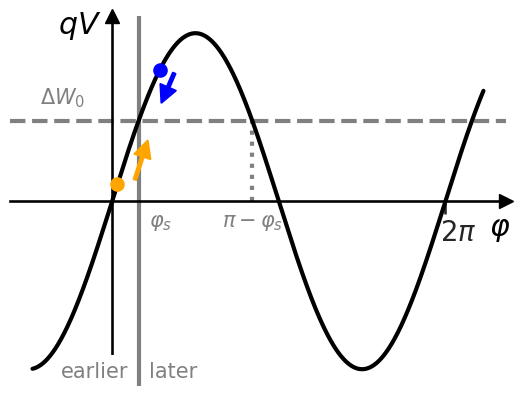

In [3]:
plot_rfwave(phi_s=0.5, regime='classical'); # try 'relativistic'

<h2>Summary</h2>

- Lorentz force, longitudinal $E_z$ field component only means to accelerate
- transit-time factor
- energy gain in rf cavity: synchronous particle and real particles
- beam rigidity $B\rho=p/|q|$
- momentum compaction, phase slippage and transition energy
- phase focusing and stability
- longitudinal tracking equations

<h2>Comprehension Questions</h2>

1. In a ring, why can one not apply a DC voltage across a gap to accelerate the particles?
---
2. Why is the rf frequency an integer multiple (the "harmonic" $h$) of the revolution frequency?
---
3. Given a typical ring layout (due to the bending magnets, the dipoles):  <br />
    a) Is the experienced circumference larger or smaller for particles with $\delta > 0$ (larger momentum than the synchronous particle)? <br />
    b) How is this effect called? <br />
    c) What happens to this effect / quantity when the bending radius becomes infinite (a.k.a. linear accelerator)?
---
4. The $\eta$ parameter is also called "phase-slip factor". It relates the arrival time (or frequency) with the momentum. <br />
    a) What is the qualitative reason for the dependency of $\eta$ on the energy / momentum? <br />
    b) At low energies with $\gamma < \gamma_\text{t}$: do particles with $\delta < 0$ arrive before or after particles with $\delta > 0$? <br />
    c) Same as b) but for high energies with $\gamma > \gamma_\text{t}$.
---
5. What are the relevant equations of motion for a particle circulating in a ring which is subject to standing waves in rf cavities?
---
6. What does an operator in the control room change to make a synchrotron accelerate the particles? The dipole magnet strength or the rf cavity timing? (i.e. which of the two parameters depends on the other?)

<h2>Exercises</h2>

Based on the CERN Proton Synchrotron machine parameters:

1. Tracking of particles for stationary synchronous particle ($\varphi_s=0$)
2. Synchrotron frequency determination (via NAFF)
3. Derivation of Hamiltonian $\mathcal{H}(z,\delta)=T(\delta) + V(z)$ for stationary synchronous particle ($\varphi_s=0$)
4. Tracking of particles for accelerating synchronous particle ($\varphi_s>0$)
5. Tracking like (4) above transition / relativistic regime

<h2>Material for Exercises</h2>

The CERN Proton Synchrotron (PS):
- has a circumference of 2π·100m
- takes protons from the PS Booster at a kinetic energy of 2GeV corresponding to a γ of 3.13
- injects with 50kV of rf voltage, up to 200kV for ramp
- runs at harmonic $h=7$
- has a momentum compaction factor of $\alpha_c=0.027$
- typical acceleration rate of (up to) $\dot{B}=2$ T/s, the bending radius is $\rho=70.08$ m

<img src="./img/ps-tunnel.jpg" alt="CERN PS tunnel" style="width:50%;"/>

Some convenience functions to compute the speed β and the relativistic Lorentz factor γ:

In [ ]:
def beta(gamma):
    '''Speed β in units of c from relativistic Lorentz factor γ.'''
    return np.sqrt(1 - gamma**-2)

def gamma(p):
    '''Relativistic Lorentz factor γ from total momentum p.'''
    return np.sqrt(1 + (p / (mass * c))**2)

We gather all the machine parameters in a class named `Machine`.

A `Machine` instance knows
- at which energy the synchronous particle (reference γ, `gamma_ref`, or alternatively the momentum `p0()`) currently runs,
- what the acceleration rate is in terms of the synchronous phase φ_s, `phi_s`
- how to compute the phase-slip factor $\eta$, `eta`, for a particle at a certain momentum p0 + Δp
- how to update the energy of the synchronous particle via `update_gamma_ref()` when a turn has passed

In [ ]:
charge = e
mass = m_p

class Machine(object):
    gamma_ref = #fill me
    circumference = #fill me
    voltage = #fill me
    harmonic = #fill me
    alpha_c = #fill me
    phi_s = #fill me
    
    def eta(self, deltap):
        '''Phase-slip factor for a particle.'''
        p = self.p0() + deltap
        return self.alpha_c - gamma(p)**-2

    def p0(self):
        '''Momentum of synchronous particle.'''
        return self.gamma_ref * beta(self.gamma_ref) * mass * c

    def update_gamma_ref(self):
        '''Advance the energy of the synchronous particle
        according to the synchronous phase by one turn.
        '''
        deltap_per_turn = charge * self.voltage / (
            beta(self.gamma_ref) * c) * np.sin(self.phi_s)
        new_p0 = self.p0() + deltap_per_turn
        self.gamma_ref = gamma(new_p0)

To compute a synchronous phase, you may use these convenience functions to compute the arcsin on the interval of [-π/2,π/2], remember you may likely want to find a synchronous phase on [0,π]!

In [ ]:
def deltap_per_turn(Bdot, rho, circumference, p0):
    Trev = circumference / (beta(gamma(p0)) * c)
    return Bdot * rho * charge * Trev

In [ ]:
def compute_phi_s(deltap_per_turn, p0, voltage):
    '''Return *first* positive phase which matches the
    given Δp/turn on the interval [0, π/2].
    Do check whether you need to use π-φ_s for stability!
    '''
    return np.arcsin(
        deltap_per_turn * beta(gamma(p0)) * c / (charge * voltage)
    )

The tracking equations for the longitudinal plane:

$$\left\{\begin{array}\,
    z_{n+1} &= z_n - \eta C \left(\cfrac{\Delta p}{p_0}\right)_n \\
    (\Delta p)_{n+1} &= (\Delta p)_n + \cfrac{q V}{(\beta c)_n}\cdot\left(\sin\left(\varphi_s - \cfrac{2\pi}{C}\cdot hz_{n+1}\right) - \sin(\varphi_s)\right)
\end{array}\right.$$

We implement it with a leapfrog (half-drift + kick + half-drift) scheme:

In [ ]:
def track_one_turn(z_n, deltap_n, machine):
    m = machine
    # half drift
    z_nhalf = z_n - m.eta(deltap_n) * deltap_n / m.p0() * m.circumference / 2
    # rf kick
    amplitude = charge * m.voltage / (beta(gamma(m.p0())) * c)
    phi = m.phi_s - m.harmonic * 2 * np.pi * z_nhalf / m.circumference
    
    m.update_gamma_ref()
    deltap_n1 = deltap_n + amplitude * (np.sin(phi) - np.sin(m.phi_s))
    # half drift
    z_n1 = z_nhalf - m.eta(deltap_n1) * deltap_n1 / m.p0() * m.circumference / 2
    return z_n1, deltap_n1

The `Machine` instance will keep track of the reference energy during the tracking by calling `update_gamma_ref()` once per turn:

In [ ]:
m = Machine()

Particles are tracked by their two longitudinal coordinates $(z, \Delta p)$. The initial values are stored in `z_ini` and `deltap_ini` as `numpy.array`s. These should have `N` entries for $N$ particles.

(You may use numpy helper functions such as `np.linspace` or `np.arange` for convenient initialisation!)

In [ ]:
n_turns = 1000
deltap_ini = np.array([0.]) #np.linspace(start, end, 20)
z_ini = np.array([0.]) #np.zeros_like(deltap_ini)

In [ ]:
N = len(z_ini)
assert (N == len(deltap_ini))

To store the coordinate values during tracking, prepare some `n_turns` long 2D arrays with `N` entries per turn:

In [ ]:
z = np.zeros((n_turns, N), dtype=np.float64)
deltap = np.zeros_like(z)

z[0] = z_ini
deltap[0] = deltap_ini

We would also like to store the reference gamma for each turn:

In [ ]:
gammas = np.zeros(n_turns, dtype=np.float64)
gammas[0] = m.gamma_ref

Let's go, here's the tracking loop over the number of turns `n_turns`!

In [ ]:
for i_turn in range(1, n_turns):
    z[i_turn], deltap[i_turn] = track_one_turn(z[i_turn - 1], deltap[i_turn - 1], m)
    gammas[i_turn] = m.gamma_ref

In [ ]:
plt.plot(gammas)
plt.xlabel('Turns')
plt.ylabel('$\gamma_{ref}$')

In [ ]:
plt.scatter(z, deltap / m.p0(), marker='.', s=0.5)
plt.xlabel('$z$ [m]')
plt.ylabel('$\Delta p/p_0$')

### Enjoy! :-))